In [1]:
# !pip install seaborn==0.9.0

In [2]:
import pandas as pd

In [3]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.columns = ["filme_id", "titulo", "genero"]
filmes.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
generos = filmes.genero.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [6]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


In [7]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.59189975  0.06924872 -0.23271987 -0.26751307 -0.57990128
   0.72640896 -0.21570661 -0.03953674 -0.13783652  0.23564713  0.42730716
   0.11194812 -0.17824542  0.46913376 -0.33860115  0.44716173  1.22635963
  -0.11618431 -0.06646233]
 [ 0.03786281 -0.29393018 -0.23762626 -0.25243101 -0.26911543  0.23463058
  -0.27062285  0.13509515  0.12880598 -0.1613866  -0.0895581  -0.14474036
  -0.10840868  0.02341822 -0.18774637  0.20451635 -0.22923088 -0.47041813
   0.08415608  0.0468881 ]
 [-0.05917995  0.13410723  1.11336072  1.93478999  2.11033416  0.15670281
  -0.32205477 -0.19997884 -0.59858872  1.21008566 -0.09492563 -0.26750376
   0.31062193  0.31119385 -0.13793552 -0.27315446  0.14006984 -0.47058478
 

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.591900,0.069249,-0.232720,-0.267513,-0.579901,0.726409,-0.215707,-0.039537,-0.137837,0.235647,0.427307,0.111948,-0.178245,0.469134,-0.338601,0.447162,1.226360,-0.116184,-0.066462
1,0.037863,-0.293930,-0.237626,-0.252431,-0.269115,0.234631,-0.270623,0.135095,0.128806,-0.161387,-0.089558,-0.144740,-0.108409,0.023418,-0.187746,0.204516,-0.229231,-0.470418,0.084156,0.046888
2,-0.059180,0.134107,1.113361,1.934790,2.110334,0.156703,-0.322055,-0.199979,-0.598589,1.210086,-0.094926,-0.267504,0.310622,0.311194,-0.137936,-0.273154,0.140070,-0.470585,-0.169234,-0.090043


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a1a871eb8>,
      dtype=object)

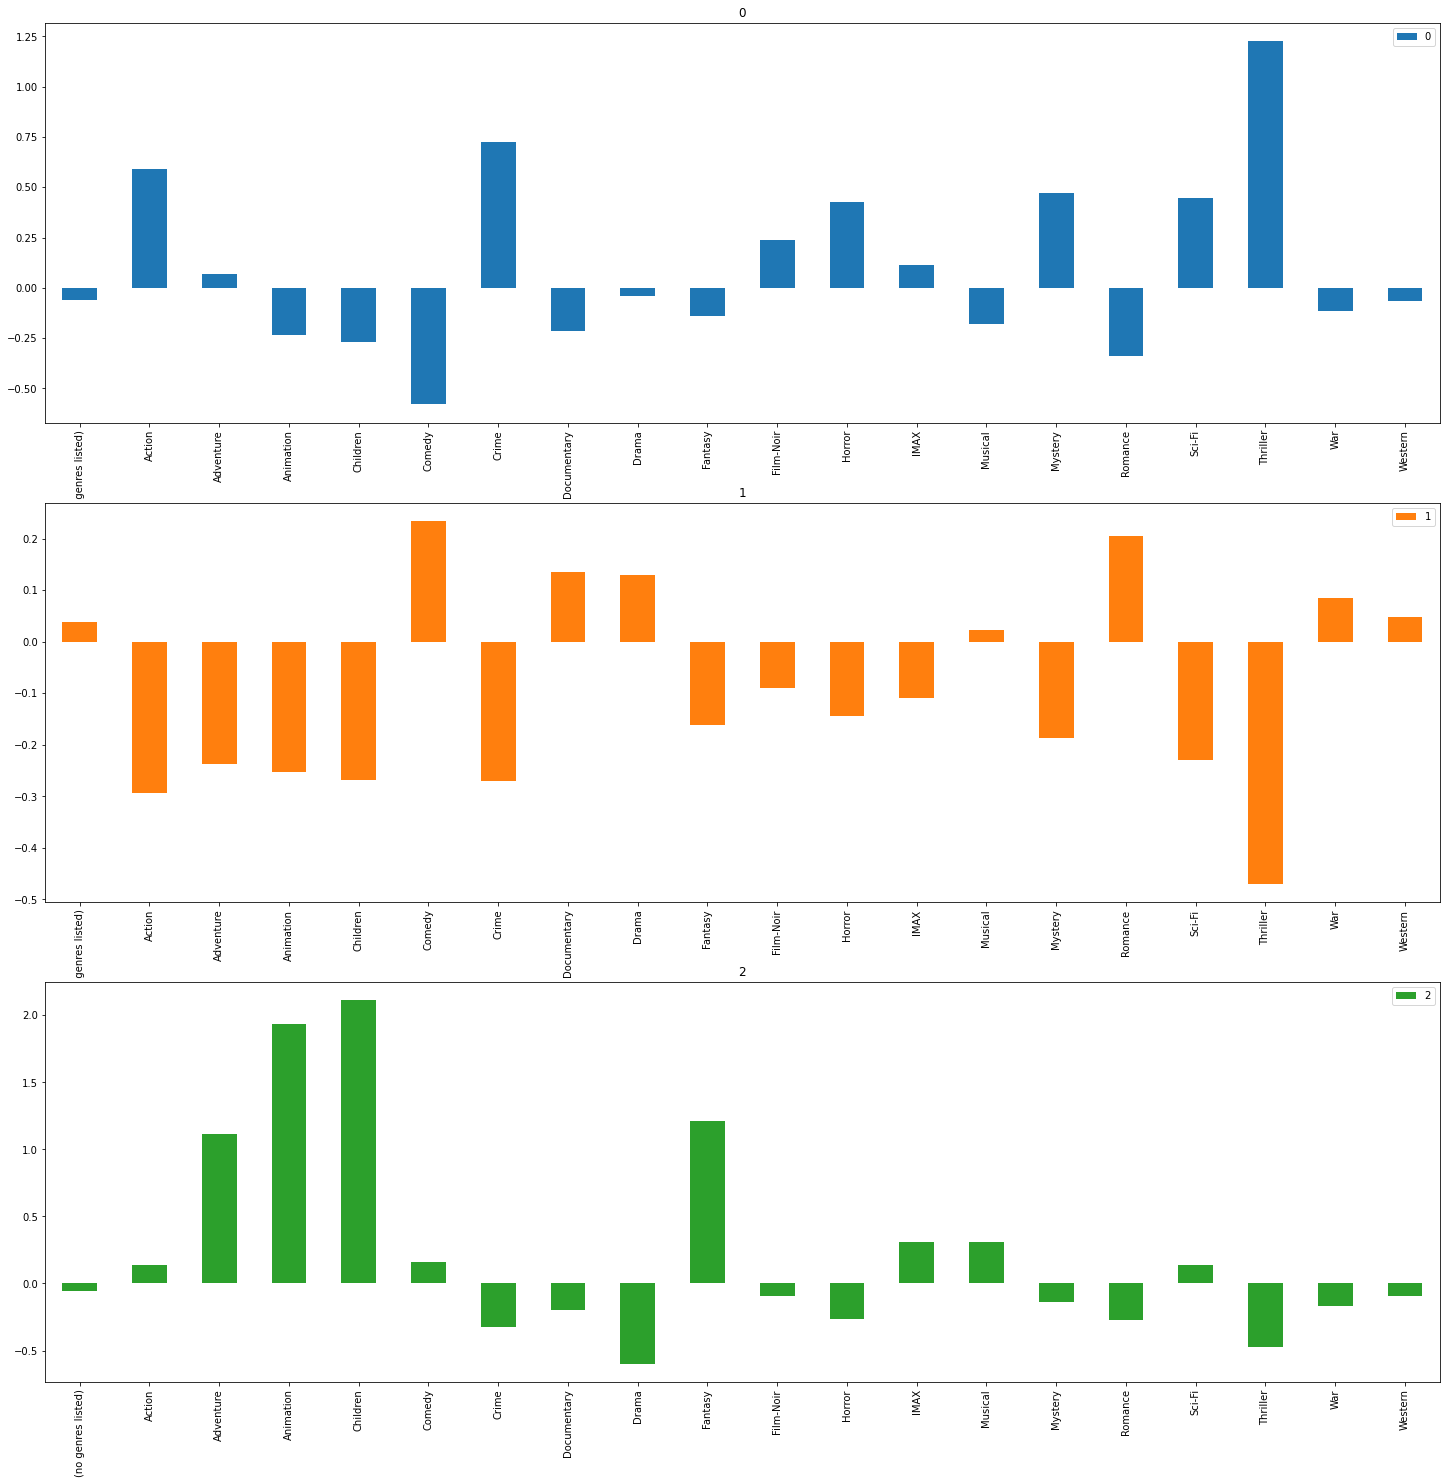

In [9]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False)

In [10]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7479,82202,"Tourist, The (2010)",Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5870,32914,Carrie (2002),Drama|Horror|Thriller,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3991,5630,Red Dragon (2002),Crime|Mystery|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
7686,89427,Shark Night 3D (2011),Horror|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7020,68480,Flatfoot on the Nile (Piedone d'Egitto) (1980),Action|Comedy|Crime,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1027,1339,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
8574,116887,Exodus: Gods and Kings (2014),Action|Adventure|Drama,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6072,41014,"Bird with the Crystal Plumage, The (Uccello da...",Crime|Horror|Mystery|Thriller,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
9465,168266,T2: Trainspotting (2017),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1802,2402,Rambo: First Blood Part II (1985),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 25.926842 ,  55.707386 ],
       [-21.048214 , -52.283752 ],
       [ 20.49325  ,  18.706684 ],
       ...,
       [  9.818291 , -10.169146 ],
       [-18.930706 ,  55.011703 ],
       [ -6.6627917,  23.849503 ]], dtype=float32)

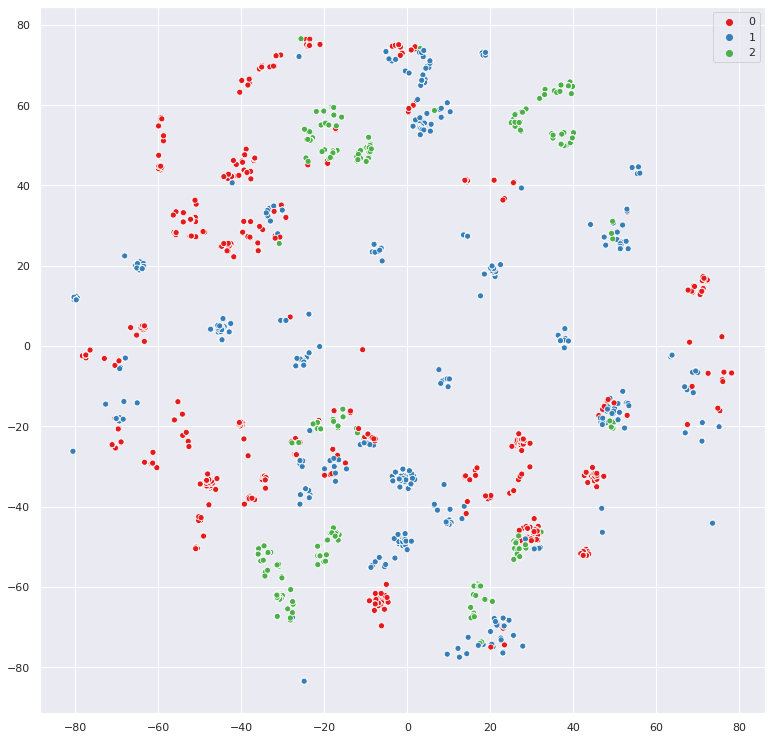

In [17]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=visualizacao[:, 0], y=visualizacao[:, 1], hue=modelo.labels_, palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a150a69e8>,
      dtype=object)

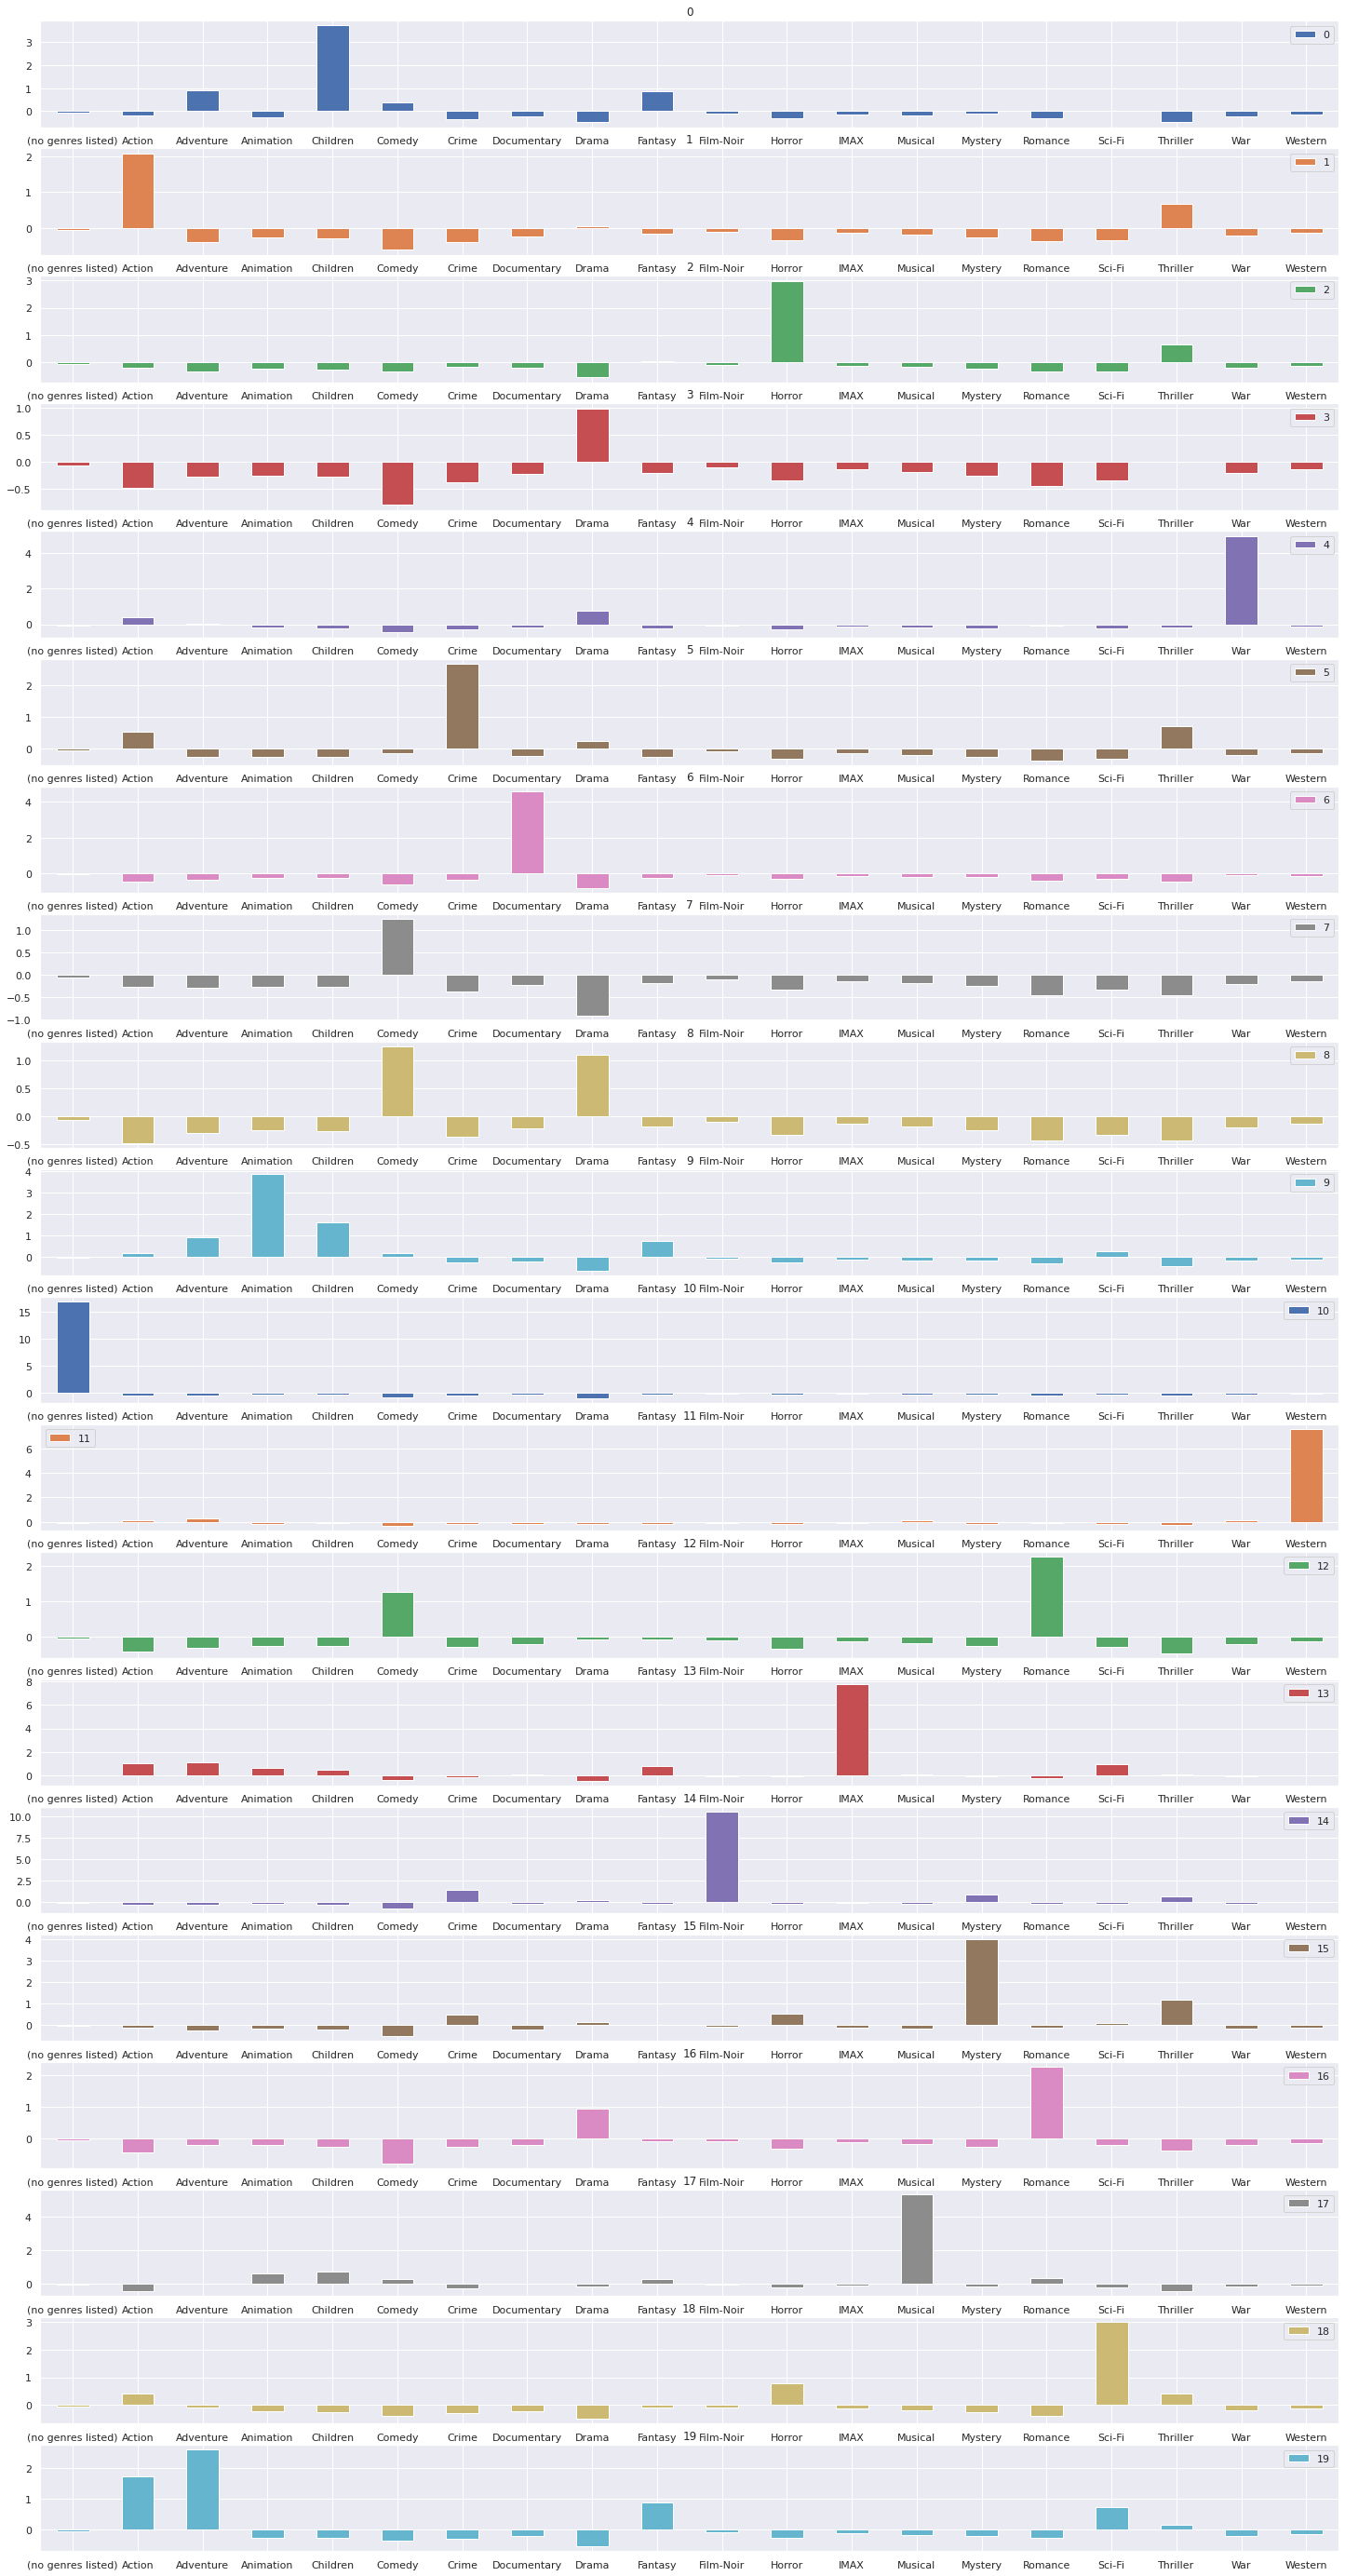

In [21]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [22]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1618,2162,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1521,2053,"Honey, I Blew Up the Kid (1992)",Children|Comedy|Sci-Fi,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8716,125974,Halloweentown High (2004),Adventure|Children|Comedy|Fantasy,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5523,26542,Ewoks: The Battle for Endor (1985),Adventure|Children|Fantasy|Sci-Fi,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
763,1005,D3: The Mighty Ducks (1996),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3699,5103,"Sandlot, The (1993)",Children|Comedy|Drama,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7093,70305,Race to Witch Mountain (2009),Adventure|Children|Fantasy|Sci-Fi|Thriller,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
5768,31223,Racing Stripes (2005),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6014,37857,MirrorMask (2005),Adventure|Children|Drama|Fantasy,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4441,6559,Little Giants (1994),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [24]:
kmeans(20, generos_escalados)

[20, 55029.66419023424]

In [25]:
kmeans(3, generos_escalados)

[3, 167964.21708155342]

In [26]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado  

[[1, 194840.0],
 [2, 179510.40662145478],
 [3, 167446.05565380308],
 [4, 156413.61946434958],
 [5, 146127.83570457555],
 [6, 137931.4696281066],
 [7, 128362.34253011213],
 [8, 118446.69932618421],
 [9, 110156.8360079432],
 [10, 104762.72064564584],
 [11, 95495.0141276549],
 [12, 87025.88035460636],
 [13, 78341.3199560486],
 [14, 74885.65287422242],
 [15, 67202.4881282527],
 [16, 63737.13906610354],
 [17, 60248.57574491715],
 [18, 58313.17071849755],
 [19, 56909.63301747583],
 [20, 55068.94114118737],
 [21, 52924.24823139181],
 [22, 51557.99636996753],
 [23, 50672.86101261754],
 [24, 49579.58603164653],
 [25, 48386.8464452315],
 [26, 46125.75754923118],
 [27, 45511.089721533455],
 [28, 43962.859499572376],
 [29, 43467.698714247024],
 [30, 42839.492839405735],
 [31, 41138.47458142385],
 [32, 41145.96933520633],
 [33, 40318.14112843105],
 [34, 38331.29536254561],
 [35, 38499.02683692942],
 [36, 37218.055929392656],
 [37, 37092.4692177556],
 [38, 36994.569090234276],
 [39, 36110.2050217741

In [27]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179510.406621
2,3,167446.055654
3,4,156413.619464
4,5,146127.835705
5,6,137931.469628
6,7,128362.342530
7,8,118446.699326
8,9,110156.836008
9,10,104762.720646


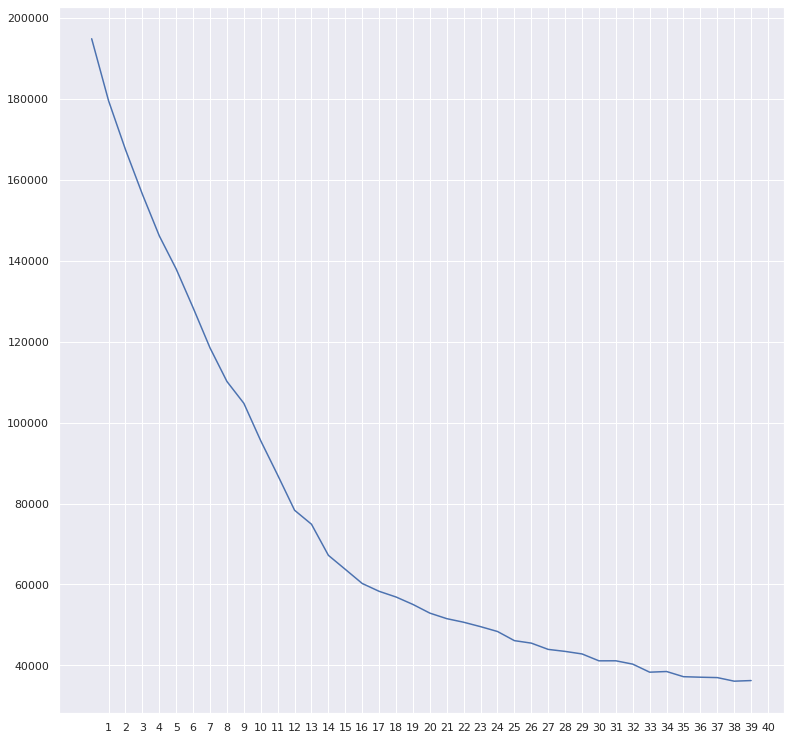

In [30]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a0c4e43c8>,
      dtype=object)

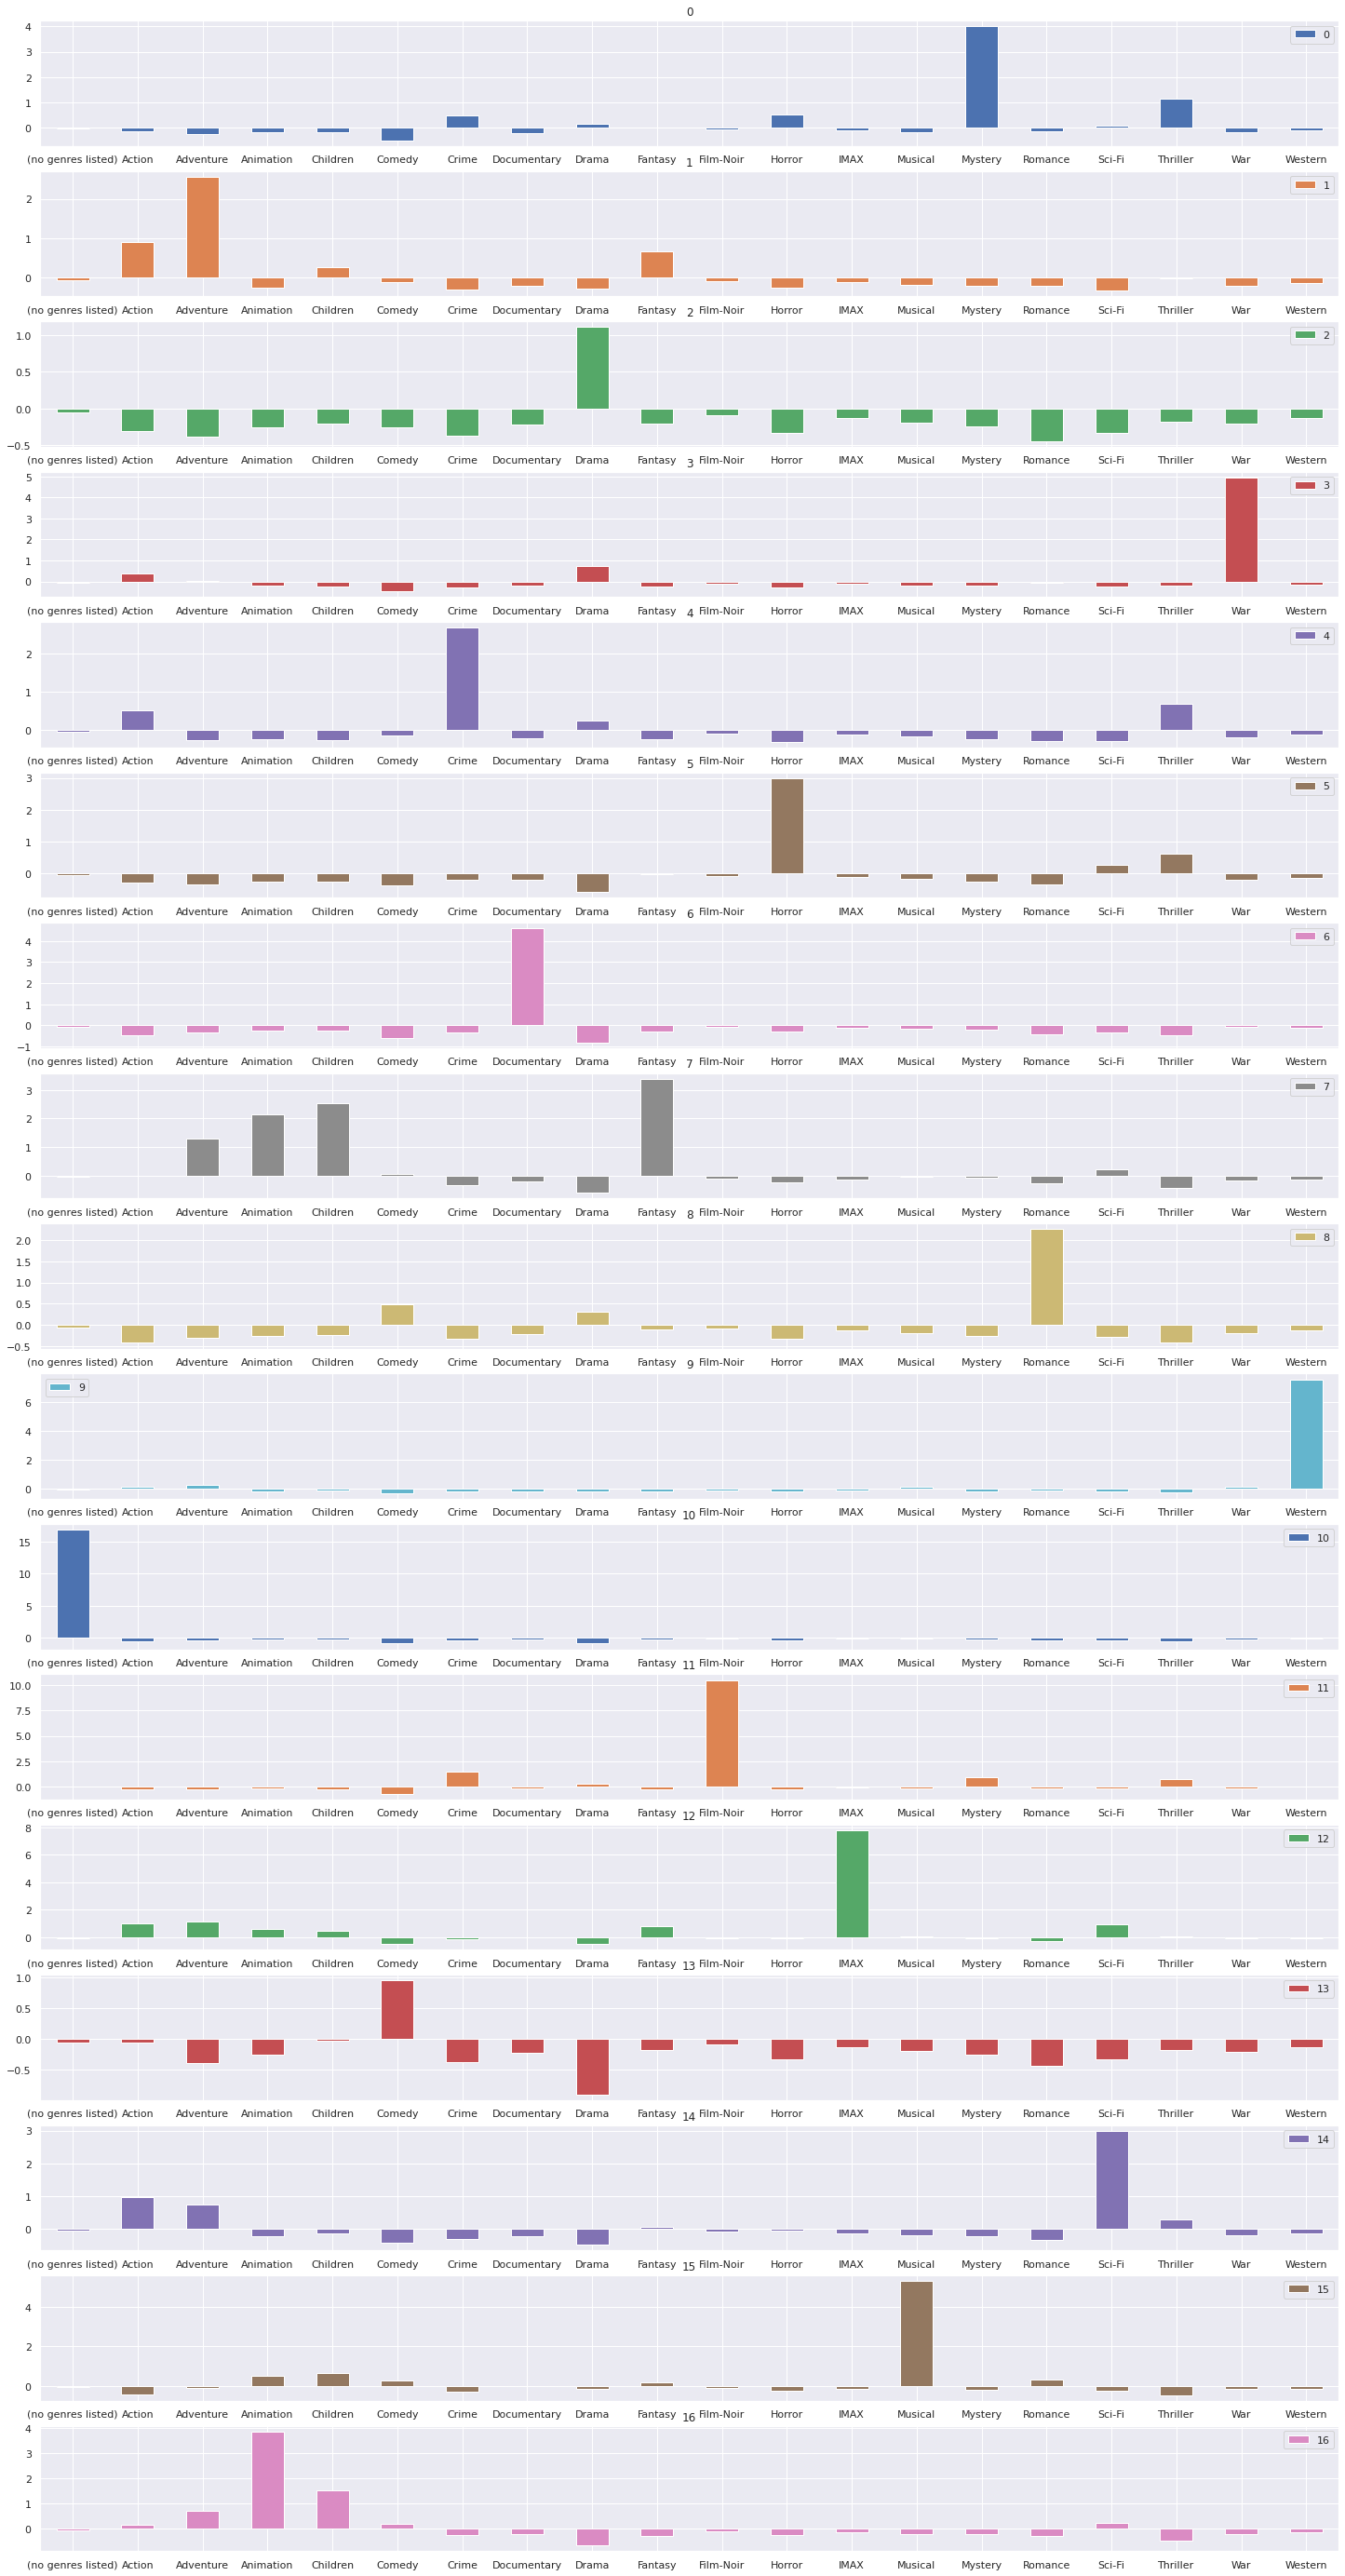

In [31]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [32]:
grupo = 9
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4748,7072,Stagecoach (1939),Action|Drama|Romance|Western,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2179,2896,Alvarez Kelly (1966),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1084,1408,"Last of the Mohicans, The (1992)",Action|Romance|War|Western,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
263,303,"Quick and the Dead, The (1995)",Action|Thriller|Western,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9164,148652,The Ridiculous 6 (2015),Comedy|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4651,6950,"Missing, The (2003)",Adventure|Thriller|Western,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6122,43419,Bandidas (2006),Action|Comedy|Crime|Western,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6648,56782,There Will Be Blood (2007),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3259,4406,"Man Who Shot Liberty Valance, The (1962)",Crime|Drama|Western,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2894,3871,Shane (1953),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [33]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [34]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-43.463974 ,  44.900745 ],
       [ 63.96941  ,  10.268772 ],
       [ 17.588657 , -13.36338  ],
       ...,
       [ -3.3610935,   9.514361 ],
       [ 25.049883 ,   8.47083  ],
       [-10.4636   , -25.211426 ]], dtype=float32)

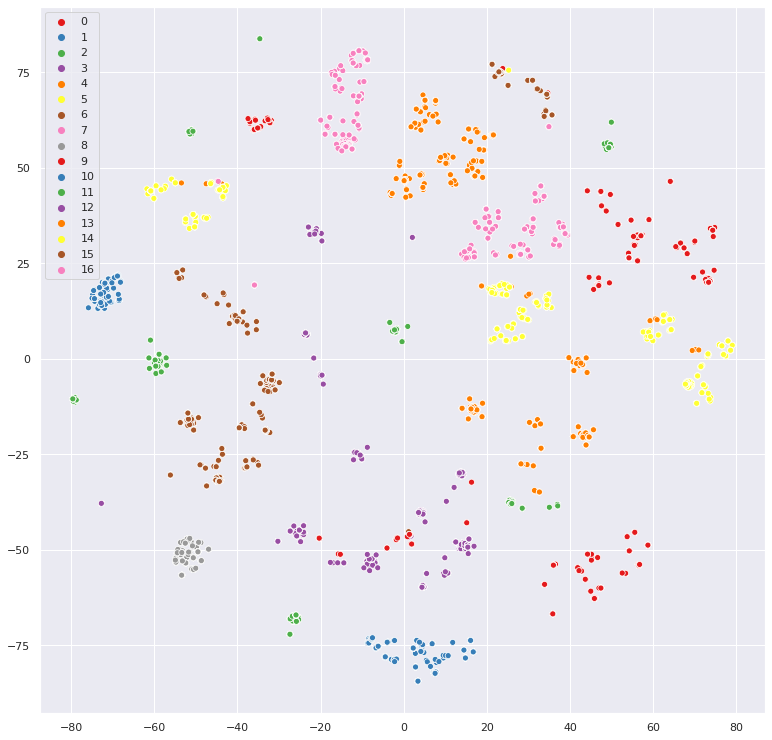

In [35]:
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=visualizacao[:, 0], y=visualizacao[:, 1], hue=grupos, palette=sns.color_palette('Set1', 17))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a0b92d2b0>,
      dtype=object)

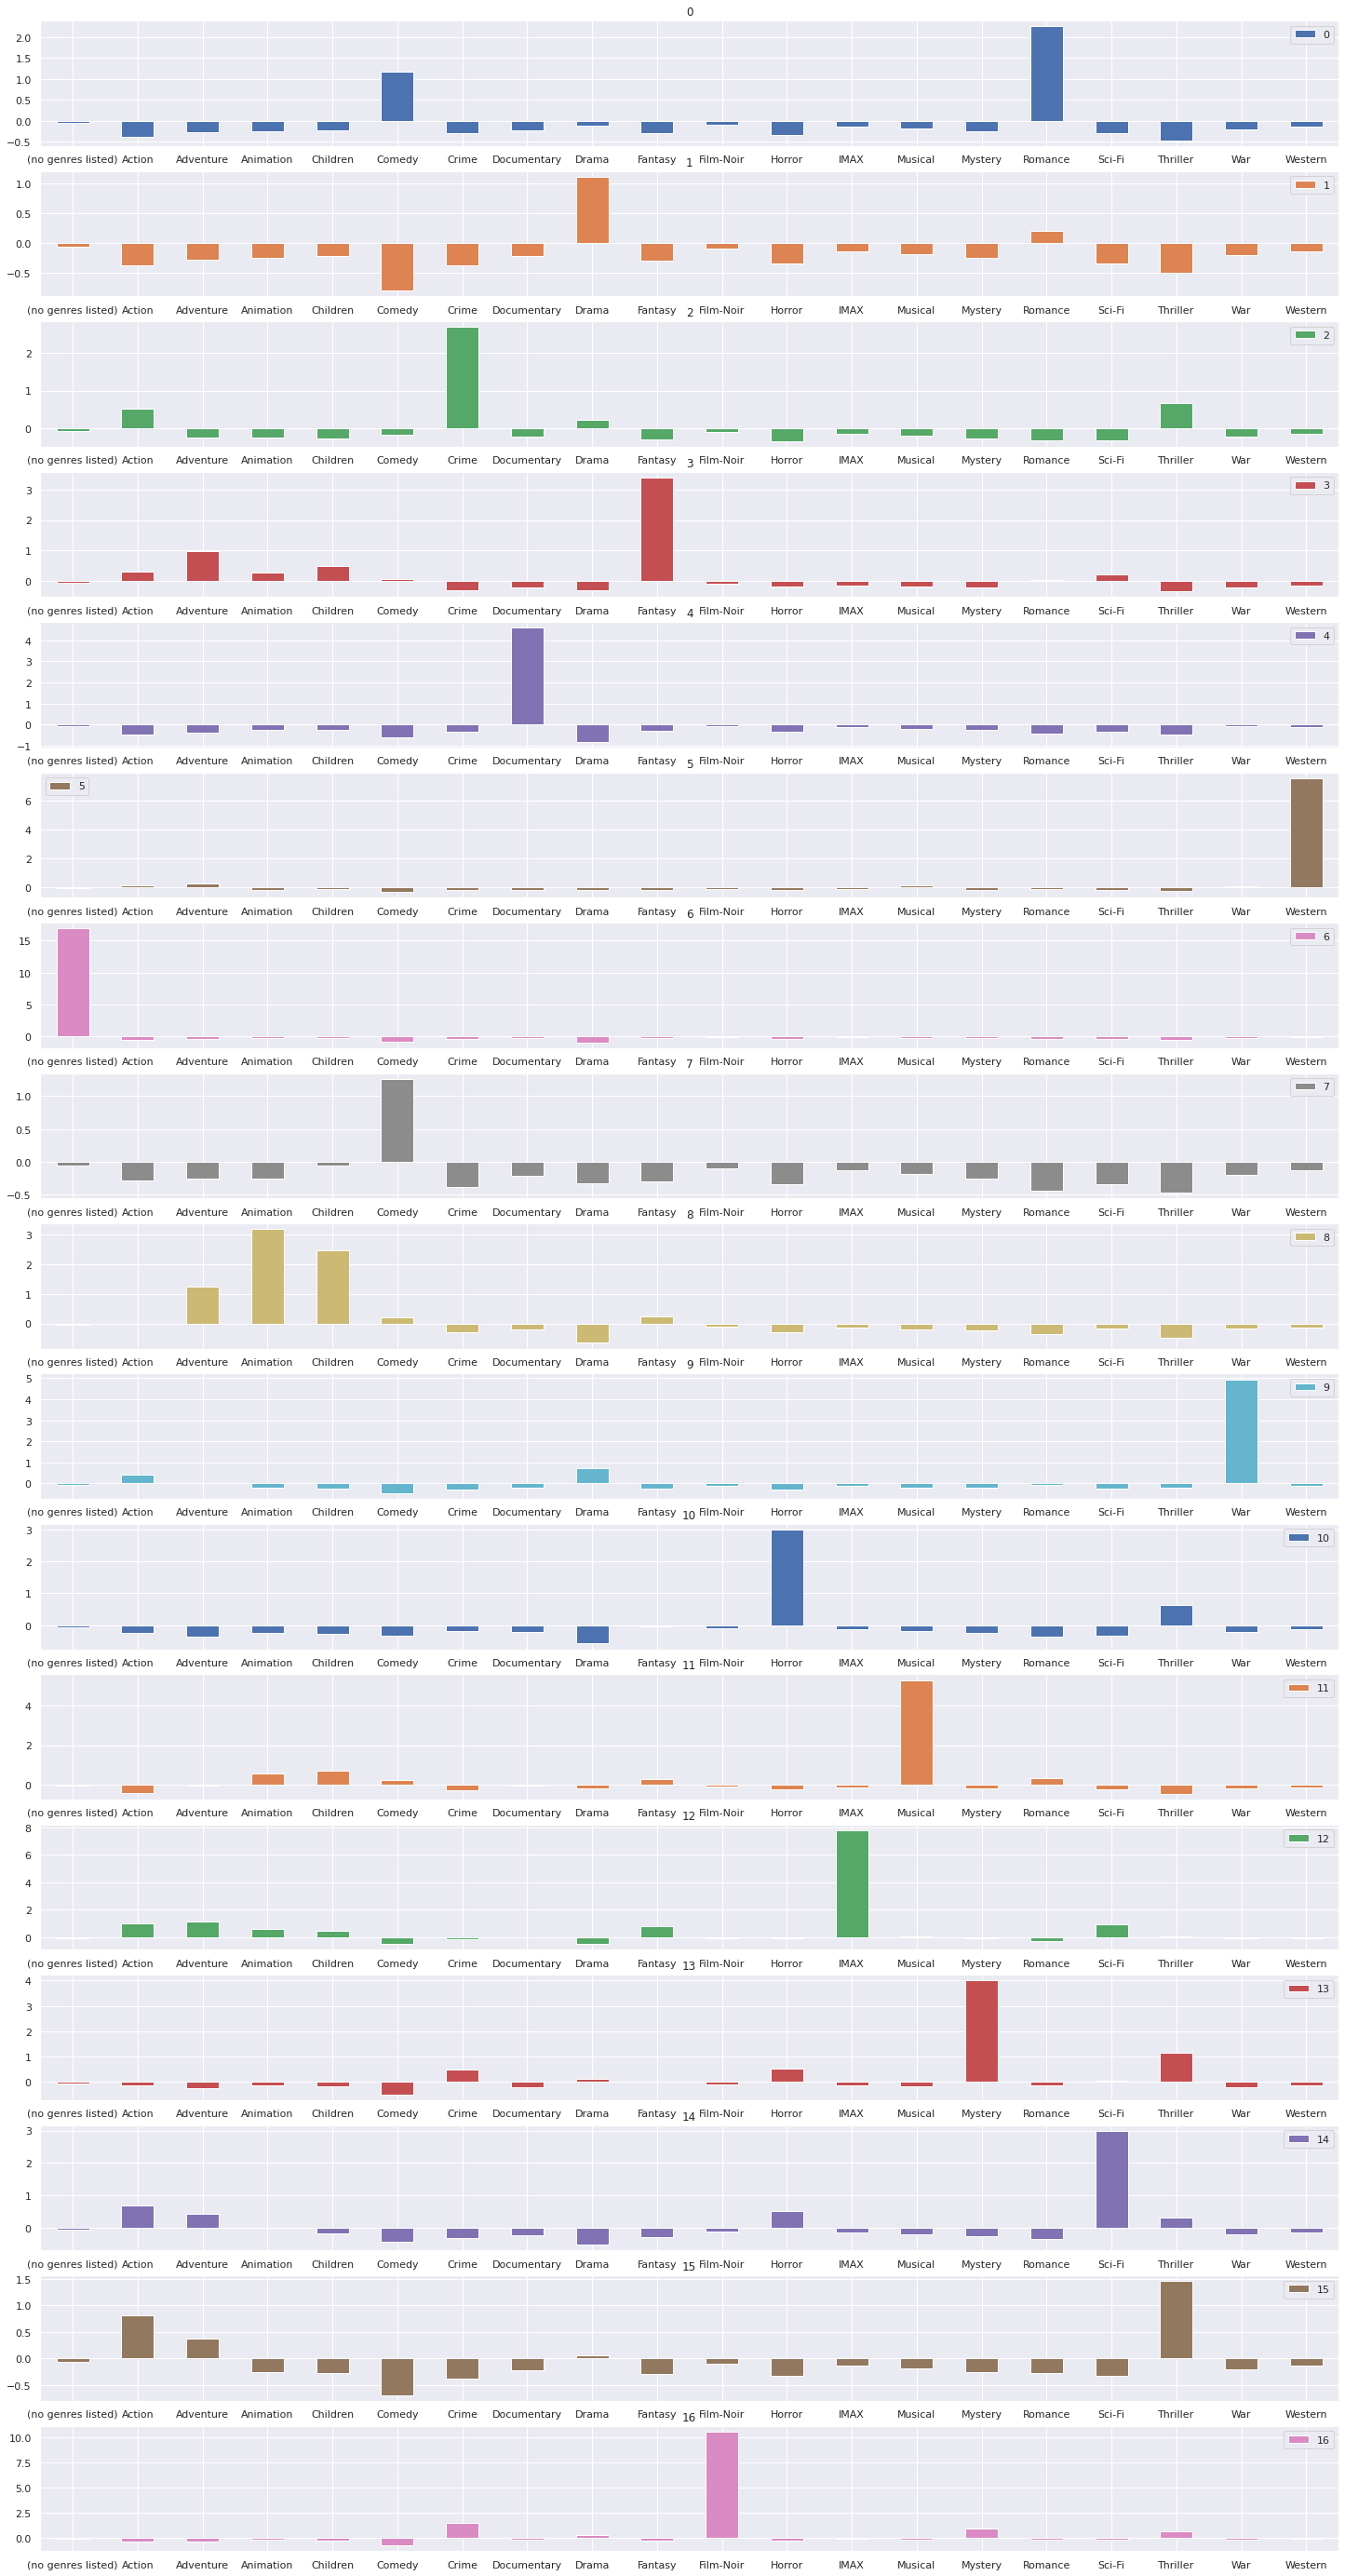

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [38]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  7.        ,  2.60093429,  2.        ],
       [15.        , 17.        ,  2.63820804,  3.        ],
       [ 0.        , 18.        ,  2.72130572,  4.        ],
       [ 2.        , 19.        ,  3.26712757,  5.        ],
       [14.        , 20.        ,  3.68663451,  6.        ],
       [10.        , 21.        ,  3.73798128,  7.        ],
       [ 3.        , 22.        ,  4.2527736 ,  8.        ],
       [13.        , 23.        ,  4.60446689,  9.        ],
       [ 8.        , 24.        ,  4.69528414, 10.        ],
       [ 4.        , 25.        ,  5.19711007, 11.        ],
       [ 9.        , 26.        ,  5.25876577, 12.        ],
       [11.        , 27.        ,  5.793499  , 13.        ],
       [ 5.        , 28.        ,  7.89280693, 14.        ],
       [12.        , 29.        ,  8.36005176, 15.        ],
       [16.        , 30.        , 10.81603165, 16.        ],
       [ 6.        , 31.        , 17.0889818 , 17.        ]])

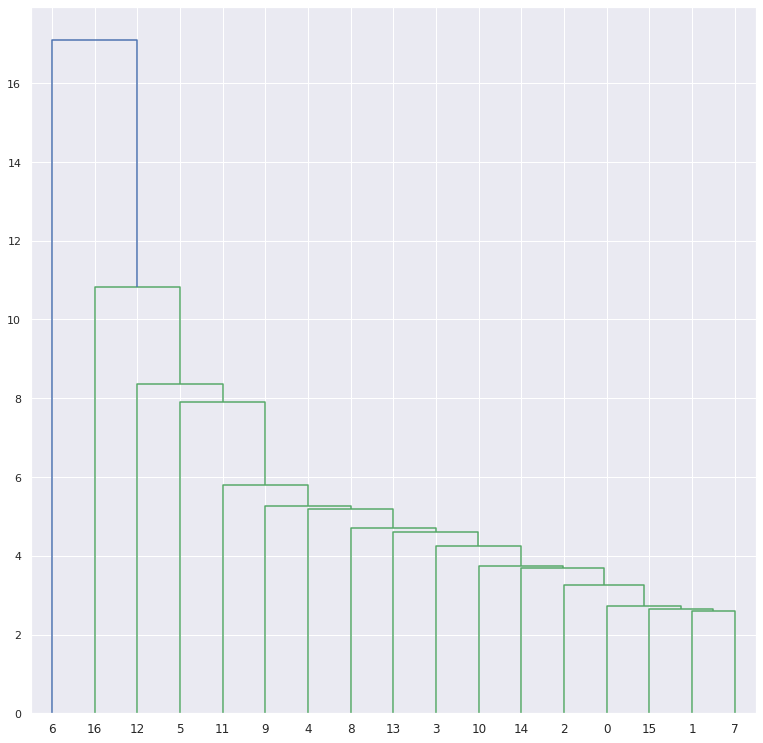

In [39]:
dendograma = dendrogram(matriz_de_distancia)